# Exemple d'utilisation d'un jeu de données CTD sous forme de profil (données d'une colonne d'eau)

Pour plus de contexte voir: [README](https://github.com/OGSL-SLGO/examples/blob/main/examples/ctd-profile/README.md)

## Partie 1: Exploration

Nous avons ici les metadonnées d'un jeu de données: https://erddap.ogsl.ca/erddap/info/mpoPmzaVikingCtdInsitu/index.html

la valeur `featureType=TimeSeriesProfile`, nous indique que ce jeu de données contient des profils de données, pris à plusieurs moments pour une même localisation.

La page https://erddap.ogsl.ca/erddap/tabledap/mpoPmzaVikingCtdInsitu.html permet de filtrer nos données et d'obtenir un lien de téléchargement.

Prenons un échantillon de données de 1 mois.

In [1]:
import pandas as pd

data_url = "https://erddap.ogsl.ca/erddap/tabledap/mpoPmzaVikingCtdInsitu.csv?station_id%2Ctime%2Cobs_lat%2Cobs_lon%2Clatitude%2Clongitude%2Cprofile%2Cdepth%2CTE90_01%2CPRES_01%2CPSAL_01%2CFLOR_01%2CDOXY_01&time%3E=2022-06-06T00%3A00%3A00Z&time%3C=2022-07-06T20%3A01%3A44Z"

dataframe = pd.read_csv(data_url, header=[0,1])
dataframe.head()


,station_id,time,obs_lat,obs_lon,latitude,longitude,profile,depth,TE90_01,PRES_01,PSAL_01,FLOR_01,DOXY_01
,Unnamed: 0_level_1,UTC,Degrees north,Degrees east,degrees_north,degrees_east,Unnamed: 6_level_1,m,degree_C,decibar,PSU,mg/m^3,micromol/L
0,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.105122,8.2790,0.106,29.7167,0.669,NaN
1,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.185451,8.2813,0.187,29.7178,0.669,NaN
2,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.233054,8.2826,0.235,29.7189,0.669,362.37
3,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.300490,8.2850,0.303,29.7167,0.669,362.37
4,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.355035,8.2879,0.358,29.7075,0.669,362.37


On remarque bien que l'on a des données d'une colonne d'eau à un moment donné.

la colonne ***profile*** semble être l'identifiant d'un profil dans ce jeu de données. Ceci est confirmé dans la page de métadonnées par `cf_role=profile_id`.

Listons les profils sur un an, pour la stations ***AZMP-ESG*** afin d'avoir une idée de la granularité temporelle:

In [2]:
data_url = "https://erddap.ogsl.ca/erddap/tabledap/mpoPmzaVikingCtdInsitu.csv?profile&station_id=%22AZMP-ESG%22&time%3E=2021-06-06T06%3A01%3A41Z&distinct()"
dataframe = pd.read_csv(data_url, header=[0,1])
dataframe.head(10)

,profile
,AZMP-ESG-21/06/06-06:01:41
0,AZMP-ESG-21/06/06-12:01:41
1,AZMP-ESG-21/06/06-18:01:41
2,AZMP-ESG-21/06/07-00:01:41
3,AZMP-ESG-21/06/07-06:01:41
4,AZMP-ESG-21/06/09-01:01:41
5,AZMP-ESG-21/06/09-19:01:41
6,AZMP-ESG-21/06/10-06:31:41
7,AZMP-ESG-21/06/12-07:01:41
8,AZMP-ESG-21/06/12-19:01:41


In [3]:
len(dataframe.profile)

204

Il semblerait qu'il y a environ 2 profils par jour pour cette station mais pas sur toute l'année.

Comme le volume de données est raisonnable, prenons la liste des profils de toutes les stations sur 1 an.

In [4]:
import pandas as pd

data_url = "https://erddap.ogsl.ca/erddap/tabledap/mpoPmzaVikingCtdInsitu.csv?station_id%2Ctime%2Clatitude%2Clongitude%2Cprofile&time%3E=2021-06-06T06%3A01%3A41Z"
dataframe = pd.read_csv(data_url, header=[0,1])
dataframe.head(10)

,station_id,time,latitude,longitude,profile
,Unnamed: 0_level_1,UTC,degrees_north,degrees_east,Unnamed: 4_level_1
0,AZMP-HLX,2021-09-17T16:01:41Z,44.3493,-63.3042,AZMP-HLX-21/09/17-16:01:41
1,AZMP-HLX,2021-09-17T22:01:41Z,44.3493,-63.3042,AZMP-HLX-21/09/17-22:01:41
2,AZMP-HLX,2021-09-18T04:01:41Z,44.3493,-63.3042,AZMP-HLX-21/09/18-04:01:41
3,AZMP-HLX,2021-09-18T10:01:41Z,44.3493,-63.3042,AZMP-HLX-21/09/18-10:01:41
4,AZMP-HLX,2021-09-18T16:01:41Z,44.3493,-63.3042,AZMP-HLX-21/09/18-16:01:41
5,AZMP-HLX,2021-09-18T22:01:41Z,44.3493,-63.3042,AZMP-HLX-21/09/18-22:01:41
6,AZMP-HLX,2021-09-19T04:31:41Z,44.3493,-63.3042,AZMP-HLX-21/09/19-04:31:41
7,AZMP-HLX,2021-09-19T10:31:41Z,44.3493,-63.3042,AZMP-HLX-21/09/19-10:31:41
8,AZMP-HLX,2021-09-20T03:31:41Z,44.3493,-63.3042,AZMP-HLX-21/09/20-03:31:41


Nous allons afficher les points de données sur un graphique.

Dans un premier temps, supprimons la deuxième ligne d'en-tête car elle va gêner panda et plotly:

In [5]:
dataframe.columns = dataframe.columns.droplevel(-1)

Nous allons maintenant rééchantilloner le jeu de données en comptant le nombre de profils par jour et par statiion.

In [6]:
dataframe['time'] = pd.to_datetime(dataframe['time'])

resampled = dataframe.groupby([pd.Grouper(key="time", freq='1D'), "station_id"]).agg({'profile': ['count']})

print(resampled)

                                     profile
                                       count
time                      station_id        
2021-06-06 00:00:00+00:00 AZMP-ESG         3
                          AZMP-STA27       2
                          IML-BA           3
                          PMZA-RIKI        2
                          PMZA-VAS         2
...                                      ...
2022-06-20 00:00:00+00:00 IML-7            2
2022-06-21 00:00:00+00:00 AZMP-ESG         5
2022-06-22 00:00:00+00:00 AZMP-ESG         3
2022-07-05 00:00:00+00:00 AZMP-STA27       1
2022-07-06 00:00:00+00:00 AZMP-STA27       2

[464 rows x 1 columns]


Créons un graphique qui affiche:
- en y, les noms des stations
- en x, le temps

La section suivante transforme les indexs en colonnes et assure qu'il n'y a qu'une ligne d'en-tête. 
Elle est nécessaire pour l'affichage avec plotly

In [7]:
resampled = resampled.reset_index()
resampled.columns = resampled.columns.droplevel(-1)
print(resampled)

                         time  station_id  profile
0   2021-06-06 00:00:00+00:00    AZMP-ESG        3
1   2021-06-06 00:00:00+00:00  AZMP-STA27        2
2   2021-06-06 00:00:00+00:00      IML-BA        3
3   2021-06-06 00:00:00+00:00   PMZA-RIKI        2
4   2021-06-06 00:00:00+00:00    PMZA-VAS        2
..                        ...         ...      ...
459 2022-06-20 00:00:00+00:00       IML-7        2
460 2022-06-21 00:00:00+00:00    AZMP-ESG        5
461 2022-06-22 00:00:00+00:00    AZMP-ESG        3
462 2022-07-05 00:00:00+00:00  AZMP-STA27        1
463 2022-07-06 00:00:00+00:00  AZMP-STA27        2

[464 rows x 3 columns]


Affichons le graphique

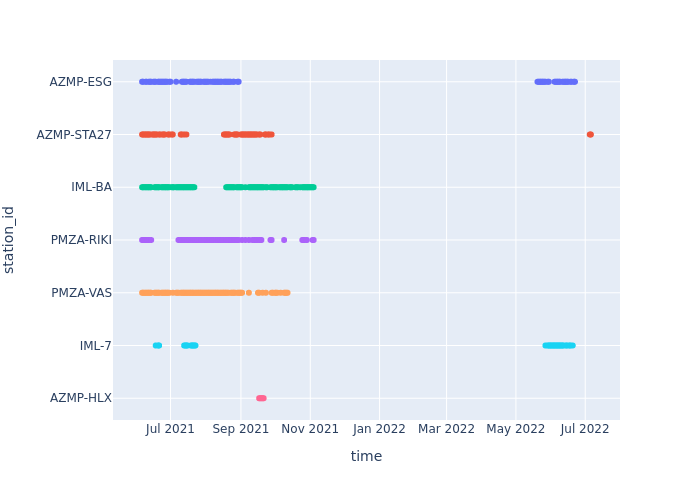

In [8]:
import plotly.express as px

fig = px.scatter(resampled, x="time", y="station_id", color="station_id", hover_data=["profile"])

fig.update_traces(hovertemplate='station_id: %{x} <br>time: %{y} <br>profile count: %{customdata[0]}')
fig.update_layout(showlegend=False)

# Remove "png" to display an interactive graph
# Le mode intéractif permet de voir de nombre de profils d'une journée avec le curseur de la souris
fig.show("png")

Ce graphique nous donnes une idée des jours sur lesquels des profils sont disponible. Il nous donne une idée de l'effort d'observation aussi (journées avec profil vs journées sans profil).

Dans le notebook suivant sur afficheront des profils pour la sation ***PMZA-VAS***